In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
sns.set(color_codes=True)
%matplotlib inline 
import matplotlib.patches as mpatches
import math
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel
from scipy.stats import norm
from fractions import Fraction 
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import variation
from statistics import variance 
from scipy.stats import describe

In [34]:
df_wc=pd.read_csv('Wholesale+Customers+Data.csv')

In [36]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [37]:
df.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [38]:
df.isnull()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False,False


In [39]:
df_wc_Region_specific = pd.DataFrame(df_wc.groupby(['Region'])['Milk','Fresh','Grocery','Frozen','Detergents_Paper','Delicatessen'].sum().reset_index())
df_wc_Region_specific['Total_spent']= df_wc_Region_specific.iloc[:, :].sum(axis=1)
df_wc_Region_specific

<ipython-input-39-4a317fef1d24>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_wc_Region_specific = pd.DataFrame(df_wc.groupby(['Region'])['Milk','Fresh','Grocery','Frozen','Detergents_Paper','Delicatessen'].sum().reset_index())


,Region,Milk,Fresh,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spent
0,Lisbon,422454,854833,570037,231026,204136,104327,2386813
1,Oporto,239144,464721,433274,190132,173311,54506,1555088
2,Other,1888759,3960577,2495251,930492,890410,512110,10677599


In [44]:
df_wc_Channel_specific = pd.DataFrame(df_wc.groupby(['Channel'])['Milk','Fresh','Grocery','Frozen','Detergents_Paper','Delicatessen'].sum().reset_index())
df_wc_Channel_specific['Total_spent']= df_wc_Channel_specific.iloc[:, :].sum(axis=1)
df_wc_Channel_specific


<ipython-input-44-a0ee88f473f7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_wc_Channel_specific = pd.DataFrame(df_wc.groupby(['Channel'])['Milk','Fresh','Grocery','Frozen','Detergents_Paper','Delicatessen'].sum().reset_index())


,Channel,Milk,Fresh,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spent
0,Hotel,1028614,4015717,1180717,1116979,235587,421955,7999569
1,Retail,1521743,1264414,2317845,234671,1032270,248988,6619931


In [46]:
df_wc_channel_skew = df_wc.groupby(['Channel']).skew().reset_index()
df_wc_channel_skew

,Channel,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Hotel,-0.077573,2.512084,4.660186,2.118316,5.211448,2.857124,11.521808
1,Retail,0.281986,1.593948,3.413169,2.980945,2.526896,2.612425,3.772841


In [48]:
df_region_skew = df.groupby(['Region'])['Milk','Fresh','Grocery','Frozen','Detergents_Paper','Delicatessen'].skew().reset_index()
df_region_skew

<ipython-input-48-69d7587514da>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_region_skew = df.groupby(['Region'])['Milk','Fresh','Grocery','Frozen','Detergents_Paper','Delicatessen'].skew().reset_index()


,Region,Milk,Fresh,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Lisbon,1.923527,2.013077,2.023387,2.334571,2.359030,2.050233
1,Oporto,1.803677,0.979873,3.637678,5.492402,3.620133,2.152210
2,Other,4.250869,2.617896,3.839176,3.963391,3.705302,10.214896


In [51]:
df_wc_channel_hotel = df_wc.loc[df_wc['Channel'] == "Hotel"]
stats_channel_hotel = df_wc_channel_hotel.describe()
stats_channel_hotel.loc['skew'] = df_wc_channel_hotel.skew().tolist()
stats_channel_hotel

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,238.369128,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
std,120.910343,13831.687502,4352.165571,3545.513391,5643.912500,1104.093673,3147.426922
min,4.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,137.250000,4070.250000,1164.500000,1703.750000,830.000000,183.250000,379.000000
50%,241.500000,9581.500000,2157.000000,2684.000000,2057.500000,385.500000,821.000000
75%,344.500000,18274.750000,4029.500000,5076.750000,4558.750000,899.500000,1548.000000
max,440.000000,112151.000000,43950.000000,21042.000000,60869.000000,6907.000000,47943.000000
skew,-0.077573,2.512084,4.660186,2.118316,5.211448,2.857124,11.521808


In [53]:
df_wc_channel_retail = df_wc.loc[df_wc['Channel'] == "Retail"]
stats_channel_retail = df_wc_channel_retail.describe()
stats_channel_retail.loc['skew'] = df_wc_channel_retail.skew().tolist()
stats_channel_retail

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,183.000000,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620
std,132.136132,8987.714750,9679.631351,12267.318094,1812.803662,6291.089697,1953.797047
min,1.000000,18.000000,928.000000,2743.000000,33.000000,332.000000,3.000000
25%,61.250000,2347.750000,5938.000000,9245.250000,534.250000,3683.500000,566.750000
50%,166.500000,5993.500000,7812.000000,12390.000000,1081.000000,5614.500000,1350.000000
75%,303.750000,12229.750000,12162.750000,20183.500000,2146.750000,8662.500000,2156.000000
max,438.000000,44466.000000,73498.000000,92780.000000,11559.000000,40827.000000,16523.000000
skew,0.281986,1.593948,3.413169,2.980945,2.526896,2.612425,3.772841


In [63]:
df_wc_region_lisbon = df_wc.loc[df_wc['Region'] == "Lisbon"]
stats_region_lisbon = df_wc_region_lisbon.describe()
stats_region_lisbon.loc['skew'] = df_wc.skew().tolist()
stats_region_lisbon

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,235.000000,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
std,22.371857,11557.438575,5704.856079,8496.287728,3092.143894,4208.462708,1345.423340
min,197.000000,18.000000,258.000000,489.000000,61.000000,5.000000,7.000000
25%,216.000000,2806.000000,1372.000000,2046.000000,950.000000,284.000000,548.000000
50%,235.000000,7363.000000,3748.000000,3838.000000,1801.000000,737.000000,806.000000
75%,254.000000,15218.000000,7503.000000,9490.000000,4324.000000,3593.000000,1775.000000
max,273.000000,56083.000000,28326.000000,39694.000000,18711.000000,19410.000000,6854.000000
skew,0.000000,2.561323,4.053755,3.587429,5.907986,3.631851,11.151586


In [64]:
df_wc_region_oporto = df_wc.loc[df_wc['Region'] == "Oporto"]
stats_region_oporto = df_wc_region_oporto.describe()
stats_region_oporto.loc['skew'] = df_wc.skew().tolist()
stats_region_oporto

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,317.000000,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
std,13.711309,8387.899211,5826.343145,10842.745314,9151.784954,6514.717668,1050.739841
min,294.000000,3.000000,333.000000,1330.000000,131.000000,15.000000,51.000000
25%,305.500000,2751.500000,1430.500000,2792.500000,811.500000,282.500000,540.500000
50%,317.000000,8090.000000,2374.000000,6114.000000,1455.000000,811.000000,898.000000
75%,328.500000,14925.500000,5772.500000,11758.500000,3272.000000,4324.500000,1538.500000
max,340.000000,32717.000000,25071.000000,67298.000000,60869.000000,38102.000000,5609.000000
skew,0.000000,2.561323,4.053755,3.587429,5.907986,3.631851,11.151586


In [65]:
df_wc_region_other = df_wc.loc[df_wc['Region'] == "Other"]
stats_region_other = df_wc_region_other.describe()
stats_region_other.loc['skew'] = df_wc.skew().tolist()
stats_region_other

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,202.613924,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266
std,143.615303,13389.213115,7935.463443,9537.287778,4260.126243,4593.051613,3232.581660
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,79.750000,3350.750000,1634.000000,2141.500000,664.750000,251.250000,402.000000
50%,158.500000,8752.500000,3684.500000,4732.000000,1498.000000,856.000000,994.000000
75%,361.250000,17406.500000,7198.750000,10559.750000,3354.750000,3875.750000,1832.750000
max,440.000000,112151.000000,73498.000000,92780.000000,36534.000000,40827.000000,47943.000000
skew,0.000000,2.561323,4.053755,3.587429,5.907986,3.631851,11.151586


In [67]:
varieties_of_products = df_wc[['Milk','Fresh','Grocery','Frozen','Detergents_Paper','Delicatessen']]

In [68]:
vop_mean = varieties_of_products.mean().sort_values(ascending=False)
vop_std = varieties_of_products.std().sort_values(ascending=False)
vop_cov = (vop_std / vop_mean)
(vop_cov*100).sort_values(ascending=False).round(2)

Delicatessen        184.94
Detergents_Paper    165.46
Frozen              158.03
Milk                127.33
Grocery             119.52
Fresh               105.39
dtype: float64

[Text(0.5, 1.0, 'Outliers for all the ITEMS')]

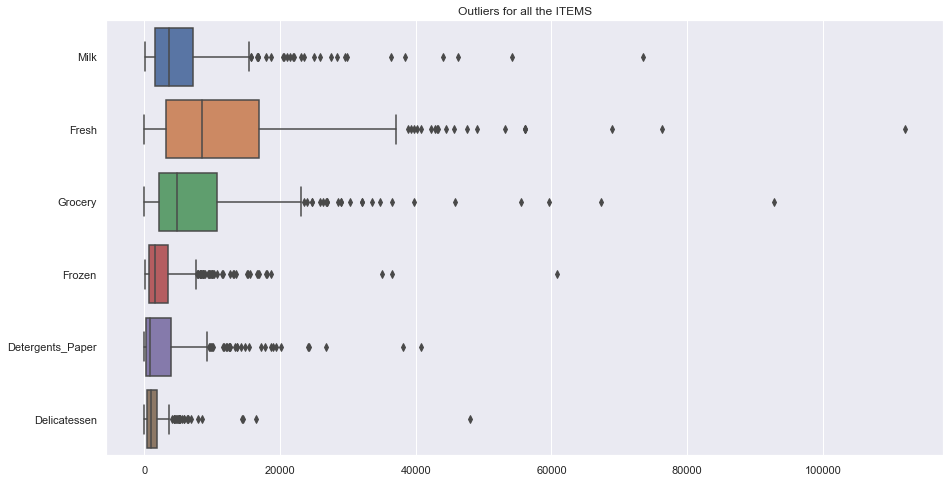

In [69]:
fig_size_alter = (15, 8)
fig , ax = plt.subplots(figsize=fig_size_alter)
sns.boxplot(data=varieties_of_products,orient='h',ax=ax).set(title = 'Outliers for all the ITEMS')

In [70]:
df_survey=pd.read_csv('Survey.csv')

In [72]:
df_survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [74]:
df_survey.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [76]:
df_survey.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [78]:
df_s_crosstab_Major = pd.crosstab(df_survey['Gender'], df_survey['Major']) 
df_s_crosstab_Major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [79]:
df_s_crosstab_Grad_Intention = pd.crosstab(df_survey['Gender'], df_survey['Grad Intention']) 
df_s_crosstab_Grad_Intention

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [80]:
df_s_crosstab_Employment = pd.crosstab(df_survey['Gender'], df_survey['Employment']) 
df_s_crosstab_Employment

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [81]:
df_s_crosstab_Computer = pd.crosstab(df_survey['Gender'], df_survey['Computer']) 
df_s_crosstab_Computer

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [87]:
df_s_gender= df_survey.groupby(['Gender']).size().reset_index(name='count')
df_s_gender

,Gender,count
0,Female,33
1,Male,29


In [89]:
Total_Gender = df_survey['Gender'].count()
Male_percent = Total_Male / Total_Gender
Female_percent = Total_Female / Total_Gender
print(Total_Male,Total_Gender,sep ="/")
print(Total_Female,Total_Gender,sep ="/")
print("Percentage of Male students is",Male_percent.round(2)*100)
print("Percentage of Female students is",Female_percent.round(2)*100)

29/62
33/62
Percentage of Male students is 47.0
Percentage of Female students is 53.0


In [90]:
df_survey["Major"].value_counts()

Retailing/Marketing       14
Economics/Finance         11
Management                10
Accounting                 7
Other                      7
International Business     6
CIS                        4
Undecided                  3
Name: Major, dtype: int64

In [91]:
df_survey_total_Major = pd.DataFrame(df_survey.groupby('Major')['Gender'].size().reset_index(name='Total_Gender'))
df_survey_total_Major

,Major,Total_Gender
0,Accounting,7
1,CIS,4
2,Economics/Finance,11
3,International Business,6
4,Management,10
5,Other,7
6,Retailing/Marketing,14
7,Undecided,3


In [94]:
df_survey_Major_on_Gender = pd.crosstab(df_survey['Major'], df_survey['Gender']).reset_index()
df_survey_Major_on_Gender
df_survey_Major_on_Gender['Total_Male']=df_survey_Major_on_Gender.apply(lambda row: int(29),axis=1)
df_survey_Major_on_Gender['Total_Female']=df_survey_Major_on_Gender.apply(lambda row: int(33),axis=1)
df_survey_Major_on_Gender

Gender,Major,Female,Male,Total_Male,Total_Female
0,Accounting,3,4,29,33
1,CIS,3,1,29,33
2,Economics/Finance,7,4,29,33
3,International Business,4,2,29,33
4,Management,4,6,29,33
5,Other,3,4,29,33
6,Retailing/Marketing,9,5,29,33
7,Undecided,0,3,29,33


In [95]:
Conditional_Prob_male = df_survey_Major_on_Gender.merge(df_survey_total_Major, on='Major', how='left')
Conditional_Prob_male['P(Major|Male) in percentage'] = Conditional_Prob_male.apply(lambda row: round((row.Male / row.Total_Male)*100,2), axis = 1)

Conditional_Prob_male

,Major,Female,Male,Total_Male,Total_Female,Total_Gender,P(Major|Male) in percentage
0,Accounting,3,4,29,33,7,13.79
1,CIS,3,1,29,33,4,3.45
2,Economics/Finance,7,4,29,33,11,13.79
3,International Business,4,2,29,33,6,6.90
4,Management,4,6,29,33,10,20.69
5,Other,3,4,29,33,7,13.79
6,Retailing/Marketing,9,5,29,33,14,17.24
7,Undecided,0,3,29,33,3,10.34


In [96]:
Conditional_Prob_Female = df_survey_Major_on_Gender.merge(df_survey_total_Major, on='Major', how='left')
Conditional_Prob_Female['P(Major|Female) in percentage'] = Conditional_Prob_Female.apply(lambda row: round((row.Female / row.Total_Female)*100,2), axis = 1)
Conditional_Prob_Female

,Major,Female,Male,Total_Male,Total_Female,Total_Gender,P(Major|Female) in percentage
0,Accounting,3,4,29,33,7,9.09
1,CIS,3,1,29,33,4,9.09
2,Economics/Finance,7,4,29,33,11,21.21
3,International Business,4,2,29,33,6,12.12
4,Management,4,6,29,33,10,12.12
5,Other,3,4,29,33,7,9.09
6,Retailing/Marketing,9,5,29,33,14,27.27
7,Undecided,0,3,29,33,3,0.00


In [97]:
df_survey["Grad Intention"].value_counts()

Yes          28
Undecided    22
No           12
Name: Grad Intention, dtype: int64

In [98]:
df_survey_total_GI = pd.DataFrame(df_survey.groupby('Grad Intention')['Gender'].size().reset_index(name='Total_Gender'))
df_survey_total_GI

,Grad Intention,Total_Gender
0,No,12
1,Undecided,22
2,Yes,28


In [99]:
df_survey_GI_on_Gender = pd.crosstab(df_survey['Grad Intention'], df_survey['Gender']).reset_index()
df_survey_GI_on_Gender
df_survey_GI_on_Gender['Total_Male']=df_survey_GI_on_Gender.apply(lambda row: int(29),axis=1)
df_survey_GI_on_Gender['Total_Female']=df_survey_GI_on_Gender.apply(lambda row: int(33),axis=1)
df_survey_GI_on_Gender

Gender,Grad Intention,Female,Male,Total_Male,Total_Female
0,No,9,3,29,33
1,Undecided,13,9,29,33
2,Yes,11,17,29,33


In [102]:
Conditional_Prob_male_GI = df_survey_GI_on_Gender.merge(df_survey_total_GI, on='Grad Intention', how='left')
Conditional_Prob_male_GI['P(Grad Intention|Male) in percentage'] = Conditional_Prob_male_GI.apply(lambda row: round((row.Male / row.Total_Male)*100,2), axis = 1)
Conditional_Prob_male_GI

,Grad Intention,Female,Male,Total_Male,Total_Female,Total_Gender,P(Grad Intention|Male) in percentage
0,No,9,3,29,33,12,10.34
1,Undecided,13,9,29,33,22,31.03
2,Yes,11,17,29,33,28,58.62


In [104]:
df_survey["Computer"].value_counts()

Laptop     55
Desktop     5
Tablet      2
Name: Computer, dtype: int64

In [105]:
df_survey_total_C = pd.DataFrame(df_survey.groupby('Computer')['Gender'].size().reset_index(name='Total_Gender'))
df_survey_total_C

,Computer,Total_Gender
0,Desktop,5
1,Laptop,55
2,Tablet,2


In [106]:
df_survey_C_on_Gender = pd.crosstab(df_survey['Computer'], df_survey['Gender']).reset_index()
df_survey_C_on_Gender['Total_Female']=df_survey_C_on_Gender.apply(lambda row: int(33),axis=1)
df_survey_C_on_Gender

Gender,Computer,Female,Male,Total_Female
0,Desktop,2,3,33
1,Laptop,29,26,33
2,Tablet,2,0,33


In [109]:
Conditional_Prob_Female_C = df_survey_C_on_Gender.merge(df_survey_total_C, on='Computer', how='left')
Conditional_Prob_Female_C['P(Computer|Female) in percentage'] = Conditional_Prob_Female_C.apply(lambda row: round((row.Female / row.Total_Female)*100,2), axis = 1)
Conditional_Prob_Female_C

,Computer,Female,Male,Total_Female,Total_Gender,P(Computer|Female) in percentage
0,Desktop,2,3,33,5,6.06
1,Laptop,29,26,33,55,87.88
2,Tablet,2,0,33,2,6.06


In [111]:
df_survey["Employment"].value_counts()


Part-Time     43
Full-Time     10
Unemployed     9
Name: Employment, dtype: int64

In [119]:
df_survey_C = pd.DataFrame(df_survey.groupby('Grad Intention')['Gender'].size().reset_index(name='Total_Gender'))
df_survey_C

,Grad Intention,Total_Gender
0,No,12
1,Undecided,22
2,Yes,28


In [134]:
df_survey_gpa = pd.DataFrame(df_survey.groupby('GPA')['Gender'].size().reset_index(name='Gender'))
df_survey_gpa

,GPA,Gender
0,2.3,1
1,2.4,1
2,2.5,6
3,2.6,2
4,2.8,3
5,2.9,4
6,3.0,7
7,3.1,7
8,3.2,6
9,3.3,5


In [140]:
df_survey_gpa = pd.crosstab(df_survey['GPA'], df_survey['Gender']).reset_index()
df_survey_gpa

df_survey_gpa

Gender,GPA,Female,Male
0,2.3,1,0
1,2.4,1,0
2,2.5,2,4
3,2.6,0,2
4,2.8,1,2
5,2.9,3,1
6,3.0,5,2
7,3.1,2,5
8,3.2,4,2
9,3.3,3,2


In [141]:
df_survey_sal = pd.crosstab(df_survey['Salary'], df_survey['Gender']).reset_index()
df_survey_sal
df_survey_sal

Gender,Salary,Female,Male
0,25.0,0,1
1,30.0,5,0
2,35.0,1,1
3,37.0,0,1
4,37.5,1,0
5,40.0,5,7
6,42.0,1,0
7,45.0,1,4
8,47.0,0,1
9,47.5,1,0


In [147]:
df_survey.corr()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
ID,1.000000,-0.075545,0.102328,-0.051484,-0.118383,-0.039676,-0.046230,0.138066
Age,-0.075545,1.000000,0.029370,-0.015536,0.011815,-0.046572,0.032968,-0.227753
GPA,0.102328,0.029370,1.000000,-0.308643,-0.197002,0.038097,-0.343403,0.042195
Salary,-0.051484,-0.015536,-0.308643,1.000000,0.017601,-0.197013,0.003402,-0.073640
Social Networking,-0.118383,0.011815,-0.197002,0.017601,1.000000,0.020125,0.073088,0.020940
Satisfaction,-0.039676,-0.046572,0.038097,-0.197013,0.020125,1.000000,0.090500,0.177548
Spending,-0.046230,0.032968,-0.343403,0.003402,0.073088,0.090500,1.000000,0.028489
Text Messages,0.138066,-0.227753,0.042195,-0.073640,0.020940,0.177548,0.028489,1.000000


In [150]:
df_survey[["GPA","Salary","Spending","Text Messages"]].describe()

,GPA,Salary,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000
mean,3.129032,48.548387,482.016129,246.209677
std,0.377388,12.080912,221.953805,214.465950
min,2.300000,25.000000,100.000000,0.000000
25%,2.900000,40.000000,312.500000,100.000000
50%,3.150000,50.000000,500.000000,200.000000
75%,3.400000,55.000000,600.000000,300.000000
max,3.900000,80.000000,1400.000000,900.000000


C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Figure(432x288)


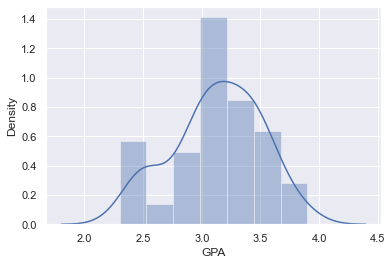

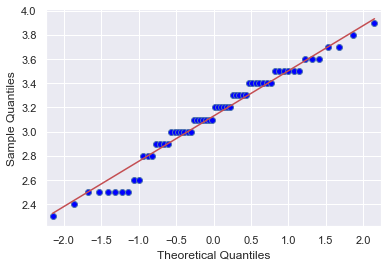

In [152]:
sns.distplot(df_survey["GPA"])
print(sm.qqplot(df_survey["GPA"], line='s'))


Figure(432x288)


C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


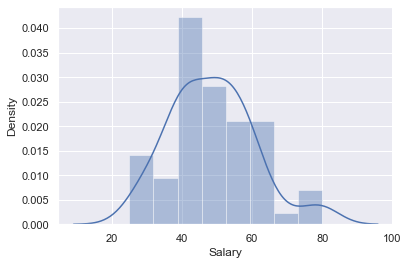

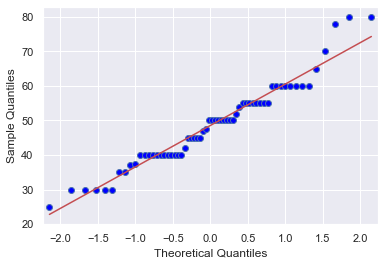

In [153]:
sns.distplot(df_survey["Salary"])
print(sm.qqplot(df_survey["Salary"], line='s'))

C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Figure(432x288)


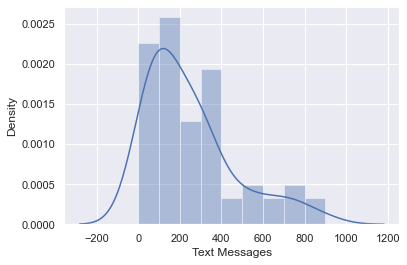

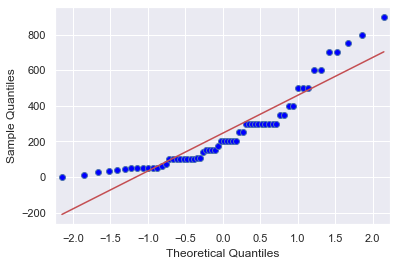

In [156]:
sns.distplot(df_survey["Text Messages"])
print(sm.qqplot(df_survey["Text Messages"], line='s'))

In [157]:
df_shingles=pd.read_csv('shingles.csv')

In [160]:
df_shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [162]:
t_statistic, p_value = ttest_1samp(df_shingles.A, 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.07477633144907513 


In [164]:
t_statistic, p_value = ttest_1samp(df_shingles.B, 0.35,nan_policy='omit' )
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: -3.1003313069986995 p value: 0.0020904774003191826 


In [170]:
t_statistic,p_value=ttest_ind(df_shingles['A'],df_shingles['B'],equal_var=True ,nan_policy='omit')
print("t_statistic={} and pvalue={}".format(round(t_statistic,3),round(p_value,3)))

t_statistic=1.29 and pvalue=0.202
